# options

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Exercise 0 - Read the data

the file is under the folder data and is named `supermarket_sales_V2.csv`

In [3]:
df = pd.read_csv('/content/supermarket_sales_V2.csv')
df.head(3)
df.shape

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,cogs,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08,Ewallet,522.83,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29,Cash,76.40,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23,Credit card,324.31,7.4


(1000, 13)

This data contains the necessary info to compute the remaining columns:

# Exercise 1 - Creating new columns

## Exercise 1.1

create a new column `Total (Before Taxes)` that represents the cost of the purchase before taxes obtained by multiplying the `quantity` by the `unit price`

In [4]:
df['Total (Before Taxes)'] = df['Quantity']*df['Unit price']

## Exercise 1.2

> Create a new column `Tax 7%` that represents a 7% of the `Total (Before Taxes)`

In [5]:
df['Tax 7%'] = df['Total (Before Taxes)']*0.07

## Exercise 1.3
> Create a new column `Total` that represents the `Total (Before Taxes)` added with the `Tax 7%`

In [6]:
df['Total'] = df['Total (Before Taxes)'] + df['Tax 7%']

## Exercise 1.4
> Create a new column `gross income` that represents the Total minus the cost of goods sold `cogs`

In [11]:
df['gross income'] = df['Total']-df['cogs']

## Exercise 1.5
> Create a new column `gross margin percentage` that represents the `gross income` as a percentage of the `Total`

In [24]:
df['gross margin percentage'] = (df['gross income']/df['Total'])*100
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,cogs,Rating,Total (Before Taxes),Tax 7%,Total,gross income,gross margin percentage,hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08,Ewallet,522.83,9.1,522.83,36.5981,559.4281,36.5981,6.542056,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29,Cash,76.40,9.6,76.40,5.3480,81.7480,5.3480,6.542056,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23,Credit card,324.31,7.4,324.31,22.7017,347.0117,22.7017,6.542056,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33,Ewallet,465.76,8.4,465.76,32.6032,498.3632,32.6032,6.542056,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37,Ewallet,604.17,5.3,604.17,42.2919,646.4619,42.2919,6.542056,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,1/29/2019,13:46,Ewallet,40.35,6.2,40.35,2.8245,43.1745,2.8245,6.542056,13
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,3/2/2019,17:16,Ewallet,973.80,4.4,973.80,68.1660,1041.9660,68.1660,6.542056,17
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,2/9/2019,13:22,Cash,31.84,7.7,31.84,2.2288,34.0688,2.2288,6.542056,13
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,2/22/2019,15:33,Cash,65.82,4.1,65.82,4.6074,70.4274,4.6074,6.542056,15


## Exercise 1.6
> Create a new column `hour` that is the hour of the day extracted from the column `Time`

In [18]:
df['hour'] = df['Time'].apply(lambda row: row.split(':')[0])


# Exercise 2 - Masking

## Exercise 2.1
> What is the median payment gross income the supermarket company has from men?

In [29]:
gross_income_from_men = df.groupby('Gender')['gross income'].median()[1]
gross_income_from_men


/tmp/ipython-input-1548609628.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gross_income_from_men = df.groupby('Gender')['gross income'].median()[1]


np.float64(16.28200000000001)

## Exercise 2.2
> How many purchases does the store in City `Mandalay` have?

In [42]:
n_purchases_mandalay = (df['City']=='Mandalay').sum()
n_purchases_mandalay

np.int64(332)

## Exercise 2.3

> What is the average rating of `Member` costumers in the store `Yangon`

In [67]:

avg_rating_member_yagon = df[(df['City']=='Yangon') & (df['Customer type']=='Member')]['Rating'].mean()
avg_rating_member_yagon
df

np.float64(6.99880239520958)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,cogs,Rating,Total (Before Taxes),Tax 7%,Total,gross income,gross margin percentage,hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08,Ewallet,522.83,9.1,522.83,36.5981,559.4281,36.5981,6.542056,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29,Cash,76.40,9.6,76.40,5.3480,81.7480,5.3480,6.542056,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23,Credit card,324.31,7.4,324.31,22.7017,347.0117,22.7017,6.542056,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33,Ewallet,465.76,8.4,465.76,32.6032,498.3632,32.6032,6.542056,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37,Ewallet,604.17,5.3,604.17,42.2919,646.4619,42.2919,6.542056,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,1/29/2019,13:46,Ewallet,40.35,6.2,40.35,2.8245,43.1745,2.8245,6.542056,13
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,3/2/2019,17:16,Ewallet,973.80,4.4,973.80,68.1660,1041.9660,68.1660,6.542056,17
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,2/9/2019,13:22,Cash,31.84,7.7,31.84,2.2288,34.0688,2.2288,6.542056,13
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,2/22/2019,15:33,Cash,65.82,4.1,65.82,4.6074,70.4274,4.6074,6.542056,15


## Exercise 2.4
what is the `Invoice ID` of the the most expensive purchase (`Total`) made in the morning (in other words: until, not including, 12 o´clock)

In [94]:
df['hour']=df['hour'].astype(int)
invoice_id = df.iloc[df[(df['hour'] < 12)]['Total'].idxmax()].loc['Invoice ID']
invoice_id

'325-77-6186'

## Exercise 2.5
> What is the product line `Women` buy most often at night (between 19h and 24h, all inclusive)

In [112]:
df[(df['Gender']=='Female') & (19<=df['hour']) & (df['hour']<=24)]['Product line'].value_counts().idxmax()

'Food and beverages'

## Exercise 2.6
> How many purchases were made by women in both `Health and beauty` and `Home and Lifestyle` `Product lines`?

In [128]:
n_purchases = df[((df['Product line']=='Health and beauty') | (df['Product line']=='Home and lifestyle')) & (df['Gender']=='Female')]['Invoice ID'].count()
n_purchases

np.int64(143)

# Exercise 3 - Groupbys

## Exercise 3.1
> what is the average `Total` by gender?

In [125]:
df.groupby('Gender')['Total'].mean()

,Total
Gender,
Female,341.478433
Male,316.709021


## Exercise 3.1 b)
> use a bar plot to show the previous result

<Axes: xlabel='Gender'>

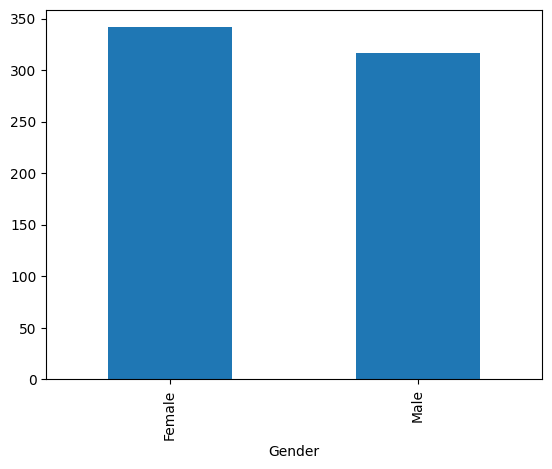

In [130]:
df.groupby('Gender')['Total'].mean().plot(kind="bar")

## Exercise 3.2
> What is the average Rating by City?

In [132]:
df.groupby('City')['Rating'].mean()

,Rating
City,
Mandalay,6.818072
Naypyitaw,7.072866
Yangon,7.027059


## Exercise 3.2 b)
> use a bar plot to show the previous result

<Axes: xlabel='City'>

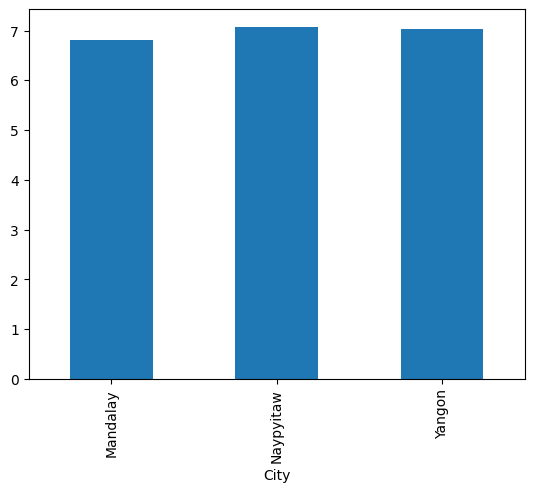

In [133]:
df.groupby('City')['Rating'].mean().plot(kind="bar")

## Exercise 3.3
> What is the `Product line` that sells most items (i.e. `Quantities`)

In [138]:
df.groupby('Product line')['Quantity'].sum().idxmax()

'Electronic accessories'

## Exercise 3.4
> What is the activity of customers throughout the day?

Compute the number of invoices at each hour of the day

In [142]:
df.groupby('hour')['Invoice ID'].count()


,Invoice ID
hour,
10,101
11,90
12,89
13,103
14,83
15,102
16,77
17,74
18,93


## Exercise 3.4 b)
> use a bar plot to show the previous result

<Axes: xlabel='hour'>

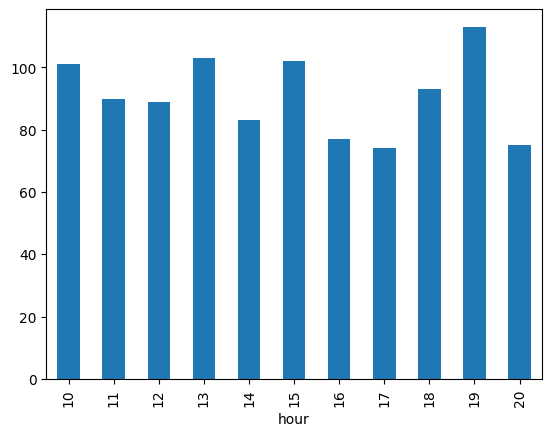

In [143]:
df.groupby('hour')['Invoice ID'].count().plot(kind='bar')

## Exercise 3.5
> For each city, what is the `Invoice ID` of the highest `gross margin` sale?

In [149]:
df.groupby('City').apply(lambda g: g.loc[g['gross margin percentage'].idxmax(), 'Invoice ID'])

/tmp/ipython-input-1364404261.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby('City').apply(


,0
City,
Mandalay,873-95-4984
Naypyitaw,592-46-1692
Yangon,272-65-1806


## Exercise 3.6

> For each customer type, what is the average rating on each Product line?

Try passing a list of columns to the `.groupby` method, and compute the average `rating` of that groupby

In [162]:
df.groupby(['Customer type', 'Product line'], as_index=False)['Rating'].mean().rename(columns={'Rating': 'avg_rating'})



,Customer type,Product line,avg_rating
0,Member,Electronic accessories,6.950000
1,Member,Fashion accessories,6.946512
2,Member,Food and beverages,6.996809
3,Member,Health and beauty,7.078082
4,Member,Home and lifestyle,6.868675
5,Member,Sports and travel,6.817241
6,Normal,Electronic accessories,6.903261
7,Normal,Fashion accessories,7.106522
8,Normal,Food and beverages,7.250000
9,Normal,Health and beauty,6.934177
